<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/storke_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data 

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
stroke_data  = pd.read_csv('/content/gdrive/MyDrive/bsc_DPBM_data_N/project/healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning data

In [ ]:
stroke_data.shape #จำนวนแถวและคอลัมน์

(5110, 12)

In [ ]:
print(stroke_data.isnull().sum())# Check for missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
stroke_data.dtypes#ดูประเภทของข้อมูล

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke_data.info() #ดูรายละเอียดของข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_data.nunique() #ดูจำนวนข้อมูลที่ไม่ซ้ำกัน

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
stroke_data_clean = stroke_data.dropna(subset =['bmi'])#ดรอป missing ของคอลัมน์ bmi
stroke_data_clean.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [ ]:
stroke_data_clean['gender'].value_counts()# drop 1 patient with other for gender 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [ ]:
stroke_data_clean = stroke_data_clean[stroke_data_clean.eq('Other').any(1)==False]

In [ ]:
stroke_data_clean['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [ ]:
stroke_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [ ]:
stroke_data_clean.isnull().any()#เช็ค missing อีกครั้ง

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

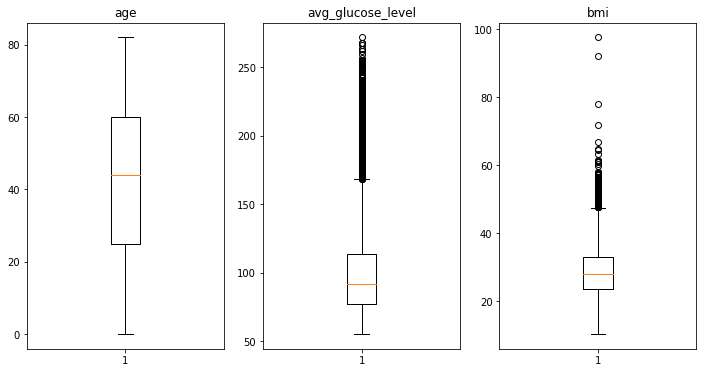

In [ ]:
import matplotlib.pyplot as plt
numerical_features = ["age", "avg_glucose_level", "bmi"] 
# Create boxplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(12, 6)) # plot boxplot ของ age,avg_glucose_level,bmi ดูการกระจายของข้อมูล
for i, feature in enumerate(numerical_features):
    axes[i].boxplot(stroke_data_clean[feature])
    axes[i].set_title(feature)
plt.show()

In [ ]:
stroke_data_clean[['avg_glucose_level','bmi','age']].describe()

,avg_glucose_level,bmi,age
count,4908.000000,4908.00000,4908.000000
mean,105.297402,28.89456,42.868810
std,44.425550,7.85432,22.556128
min,55.120000,10.30000,0.080000
25%,77.067500,23.50000,25.000000
50%,91.680000,28.10000,44.000000
75%,113.495000,33.10000,60.000000
max,271.740000,97.60000,82.000000


In [ ]:
stroke_data_clean = stroke_data_clean[stroke_data_clean['bmi'] < 50] #เลือกคนที่มีค่า bmi น้อยกว่า 50
stroke_data_clean.shape

(4829, 12)

In [ ]:
stroke_data_clean = stroke_data_clean[stroke_data_clean['age'] > 1] #เลือกคนที่มีอายุตั้งแต่ 1 ปีขึ้นไป 
stroke_data_clean.shape

(4782, 12)

In [ ]:
stroke_data_clean = stroke_data_clean[stroke_data_clean['avg_glucose_level'] > 70 ] #เลือกคนที่มีค่าระดับน้ำตาลในเลือดเฉลี่ยมากกว่า 70 
stroke_data_clean.shape

(4062, 12)

In [ ]:
stroke_data_clean['id'].duplicated().any() #เช็คว่า id ซ้ำมั้ย

False

In [ ]:
stroke_data_cleaned = stroke_data_clean.drop("id", axis=1) #ดรอปคอลัมน์ id 

In [ ]:
stroke_data_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_data_cleaned['stroke'].value_counts() #

0    3874
1     188
Name: stroke, dtype: int64

# Pre-processing data

https://medium.com/data-espresso/scale-or-standardize-or-normalize-ef905613f275

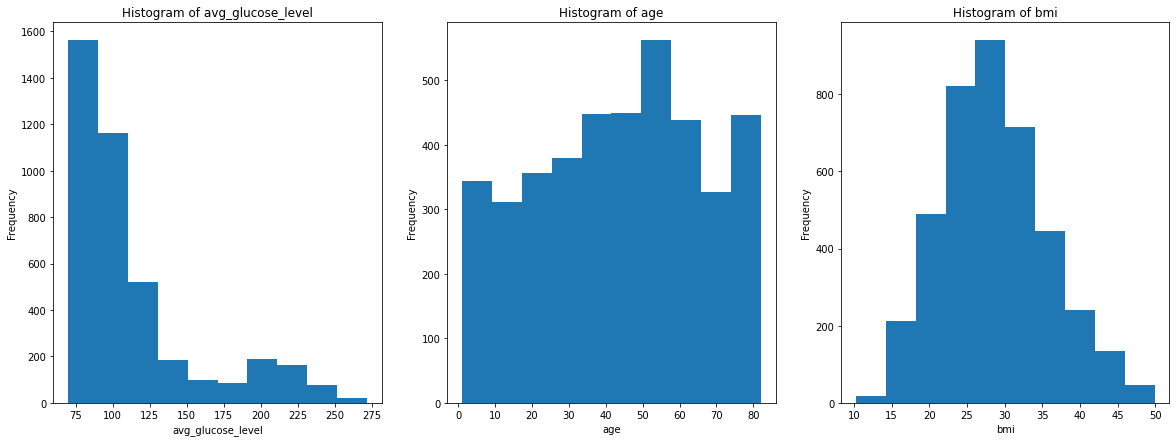

In [ ]:
import matplotlib.pyplot as plt
# plot histrogram เพื่อดูความถี่ของข้อมูล
# create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

# plot the histogram of 'avg_glucose_level' on the first subplot
axes[0].hist(stroke_data_cleaned['avg_glucose_level'])
axes[0].set_xlabel('avg_glucose_level')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of avg_glucose_level')

# plot another histogram on the second subplot
axes[1].hist(stroke_data_cleaned['age'])
axes[1].set_xlabel('age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of age')

# plot another histogram on the third subplot
axes[2].hist(stroke_data_cleaned['bmi'])
axes[2].set_xlabel('bmi')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of bmi')

# display the figure
plt.show()

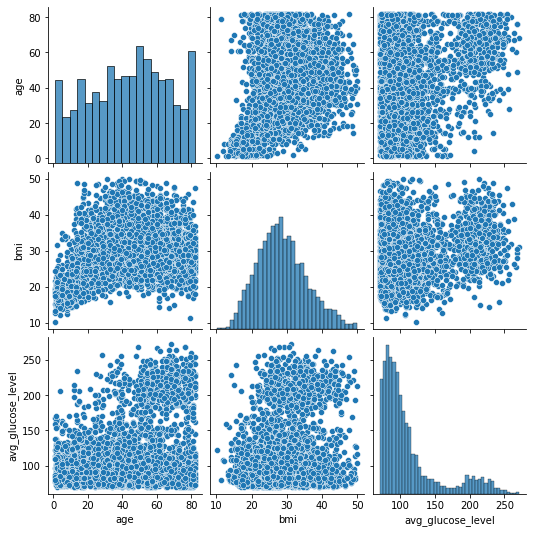

In [ ]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
# Pair plot of age, BMI, and average glucose level
sns.pairplot(data=stroke_data_cleaned[["age", "bmi", "avg_glucose_level"]])
plt.show()

## StandardScaler

https://www.sklsongkiat.com/articles/detail/normalization-%E0%B9%81%E0%B8%A5%E0%B8%B0-standardization-%E0%B9%81%E0%B8%95%E0%B8%81%E0%B8%95%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AD%E0%B8%A2%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B9%84%E0%B8%A3-%E0%B8%84%E0%B8%99%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99-machine-learning-%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%A3%E0%B8%B9%E0%B9%89

In [ ]:
from sklearn import preprocessing

numeric_features =  stroke_data_cleaned[['avg_glucose_level','age','bmi']]

#define บอกว่าวิธีการที่เราจะทำคืออะไร () เป็นพารามิเตอร์ที่เราใส่ได้
scaler = preprocessing.StandardScaler()
#train สร้างโมเดลจาก data 
scaler.fit_transform(numeric_features)
#predict-transform
numeric_features_s = scaler.transform(numeric_features)

Text(0.5, 1.0, 'bmi(standardized)')

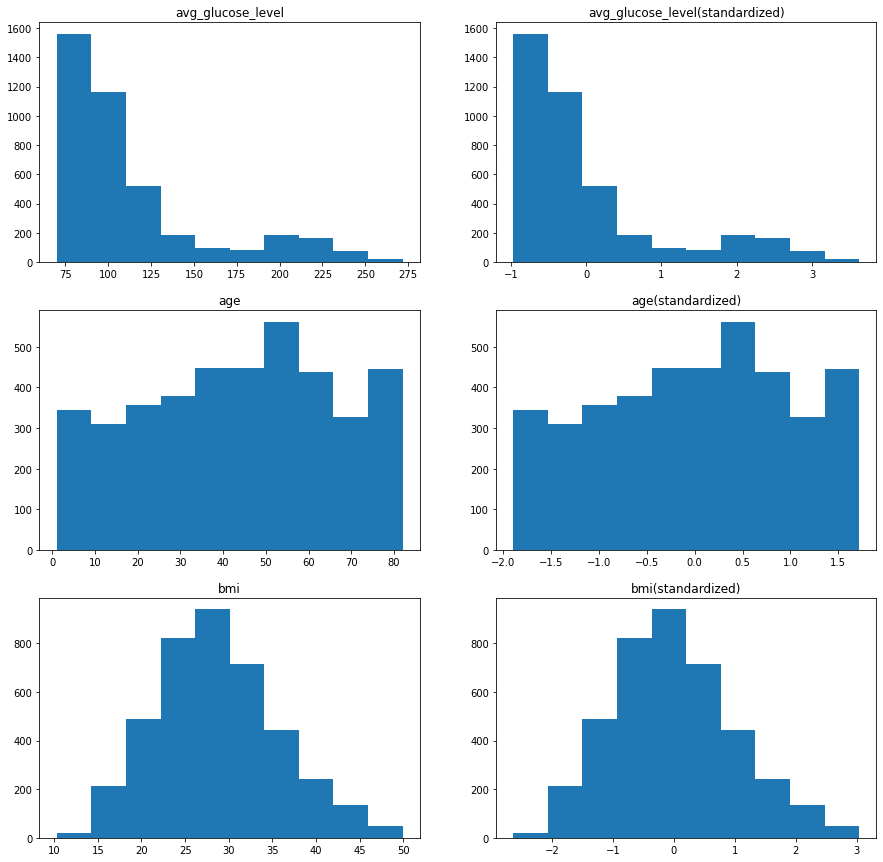

In [ ]:
plt.subplot(3,2,1)
plt.hist(numeric_features['avg_glucose_level']);
plt.title('avg_glucose_level')

plt.subplot(3,2,2)
plt.hist(numeric_features_s[:,0]);
plt.title('avg_glucose_level(standardized)')

plt.subplot(3,2,3)
plt.hist(numeric_features['age']);
plt.title('age')

plt.subplot(3,2,4)
plt.hist(numeric_features_s[:,1]);
plt.title('age(standardized)')

plt.subplot(3,2,5)
plt.hist(numeric_features['bmi']);
plt.title('bmi')

plt.subplot(3,2,6)
plt.hist(numeric_features_s[:,2]);
plt.title('bmi(standardized)')

## One-hot-encoder

In [ ]:
stroke_data_cleaned_dummies = pd.get_dummies(stroke_data_cleaned,columns=['gender','ever_married','work_type','smoking_status','Residence_type'])

In [ ]:
stroke_data_cleaned_dummies

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# K-means

## Elbow method

https://lengyi.medium.com/%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-clusters-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-kmeans-clustering-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-elbow-method-85421efe9d

In [ ]:
#Elbow method
#คือวิธีการวัด Error ของผลรวมของระยะห่างระหว่าง Object กับ Centroid
#import
from sklearn.cluster import KMeans

#สร้าง list เปล่าไว้เก็บค่า Within-Cluster-Sum-of-Squares (WCSS) จากการรัน KMeans
wcss = []

for k in range(1, 21):
    km = KMeans(n_clusters = k) #k คือ 1-20
    km = km.fit(numeric_features_s)
    wcss.append(km.inertia_) #inertia_ คือค่าที่บอกระยะทาง sum square distance ของทุกจุดเมื่อเทียบกับตัว centrio ที่อยู่ใกล้

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

https://stackoverflow.com/questions/2018178/finding-the-best-trade-off-point-on-a-curve

In [ ]:
import numpy.matlib
import numpy as np
#function ที่ใช้สำหรับหาค่า K ที่เหมาะสมที่สุด
nPoints = len(wcss)
allCoord = np.vstack((range(nPoints), wcss)).T
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)

print(f'Optimum number of cluster by Elbow method: {idxOfBestPoint}')

Optimum number of cluster by Elbow method: 3


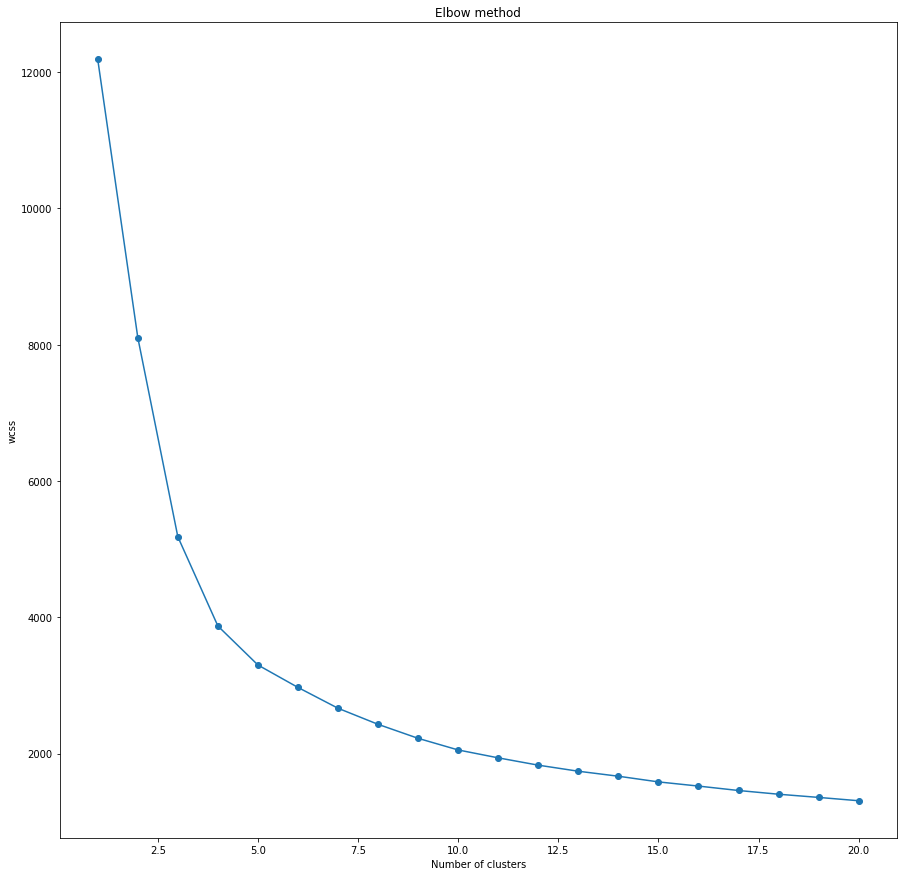

In [ ]:
plt.plot(range(1,21), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
#ในการจัด Cluster แต่ละรอบเนี่ย ค่านี้จะมีค่าลดลงเรื่อย ๆ จากจำนวน Cluster ที่เยอะขึ้น เพราะว่าสมาชิกในแต่ละ Cluster จะลงลดไปเรื่อย ๆ นั่นเอง ดังนั้นค่า SSE จะทำให้เกิดความโค้งที่เรียบขึ้นเรื่อย ๆ

https://www.w3schools.com/python/python_ml_k-means.asp

## Silhouette method

https://medium.com/espressofx-notebook/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-k-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B8%B8%E0%B8%94%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5-silhouette-b367fdae24d4#:~:text=Silhouette%20%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%83%E0%B8%8A%E0%B9%89,%E0%B8%84%E0%B8%A5%E0%B9%89%E0%B8%B2%E0%B8%A2%E0%B8%81%E0%B8%B1%E0%B8%9A%20Cluster%20%E0%B8%AD%E0%B8%B7%E0%B9%88%E0%B8%99%E0%B8%99%E0%B9%89%E0%B8%AD%E0%B8%A2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#ค่ายิ่งมาก ตัวอย่าง ก็จะมีความคล้ายกับ Cluster ของกลุ่มตัวเองมาก และมีความคล้ายกับ Cluster กลุ่มอื่น ๆ น้อย
#Silhouette เป็นเทคนิคที่ใช้วัดว่า ตัวอย่าง นั้นมีความเหมือนกับ Cluster ที่มันอยู่มากเพียงใด เมื่อเทียบกับ Cluster อื่นๆ ค่าของ Silhouette อยู่ในช่วง -1 ถึง 1 ยิ่งมีค่ามากแสดงว่า ตัวอย่าง มีความคล้ายกับ cluster ของมันมากและมีความคล้ายกับ Cluster อื่นน้อย
silhouette_scores = []
num_clusters = []
x=[]
for k in range(2, 21):
    km = KMeans(n_clusters = k)
    km.fit(numeric_features_s)
    sil_avg = silhouette_score(numeric_features_s, km.labels_).round(4)
    silhouette_scores.append(sil_avg)
    num_clusters.append(k)
    x.append([sil_avg,k])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
print(f'Optimum number of cluster: {max(x)[1]}')

Optimum number of cluster: 3


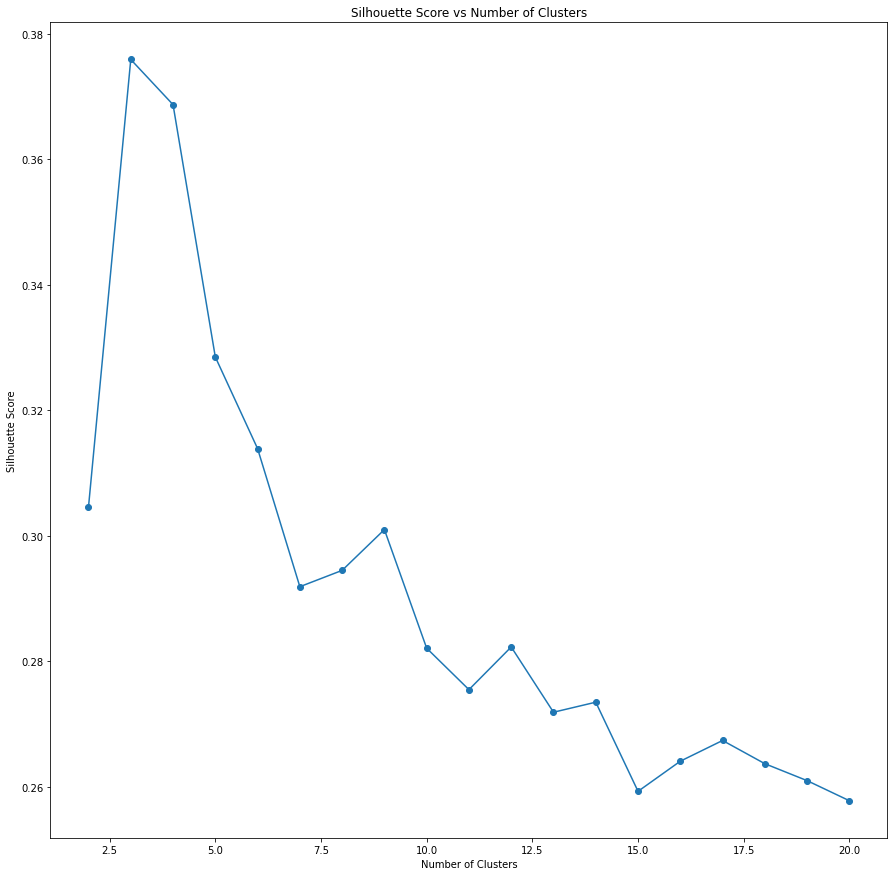

In [ ]:
# Plot the silhouette scores against the number of clusters
plt.plot(num_clusters, silhouette_scores,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

## Gap statistic method 

https://medium.com/towards-data-science/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=21):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(numeric_features_s)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

In [ ]:
score_g, df = optimalK(numeric_features_s, nrefs=5, maxClusters=21)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Gap Statistic vs. K')

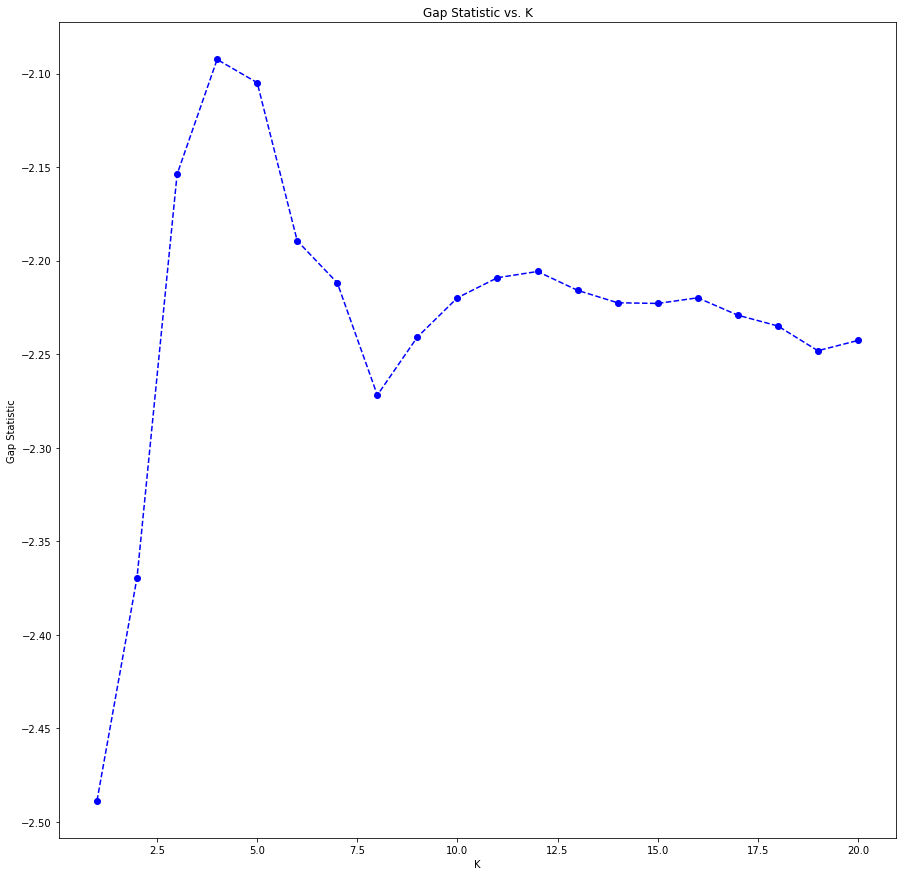

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K')

## Train Model (K-means)

In [ ]:
#Import 
from sklearn.cluster import KMeans
#Define
kmeans = KMeans(n_clusters=4, random_state=1)
#Train
kmeans.fit(numeric_features_s)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [ ]:
kmeans.cluster_centers_ #แถวแรกคือ cluster ที่ 1

array([[-0.31317577, -1.12933091, -0.88635781],
       [ 2.18543262,  0.79150502,  0.56372473],
       [-0.38192638, -0.08464146,  1.13320484],
       [-0.37813157,  0.77876724, -0.19915409]])

In [ ]:
kmeans.labels_ #ค่าที่ทำนาย

array([1, 3, 1, ..., 2, 1, 3], dtype=int32)

https://towardsdatascience.com/how-to-use-unsupervised-learning-to-cluster-well-log-data-using-python-a552713748b5

In [ ]:
import seaborn as sns
import matplotlib

In [ ]:
labels = kmeans.labels_ 
numeric_features['K-means_label'] = labels

<ipython-input-332-d19753f01e85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['K-means_label'] = labels


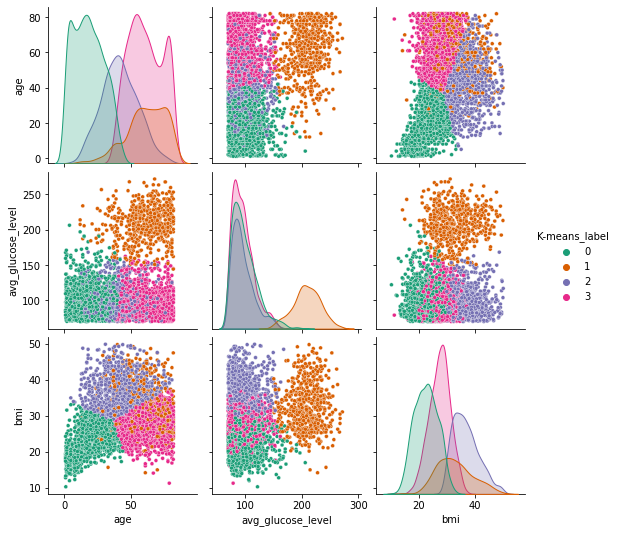

In [ ]:
sns.pairplot(numeric_features, vars=['age', 'avg_glucose_level','bmi'], hue='K-means_label', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})#ดูรูปแบบความสัมพันธ์ แบบคู่ระหว่างตัวแปรภายในแต่ละคลัสเตอร์ และสามารถช่วยระบุรูปแบบและความสัมพันธ์ที่อาจไม่ปรากฏให้เห็นจากข้อมูลดิบเพียงอย่างเดียว
plt.show()#การจัดกลุ่มค่าเฉลี่ย K สามารถใช้จัดกลุ่มผู้ป่วยตามอายุ bmi และระดับน้ำตาลในเลือดเฉลี่ย ซึ่งสามารถให้ข้อมูลเชิงลึกเกี่ยวกับปัจจัยเสี่ยงของโรคหลอดเลือดสมองในประชากรที่แตกต่างกัน 

In [ ]:
numeric_features['K-means_label'].value_counts()#จำนวนสมาชิกในแต่ละกลุ่ม

3    1327
0    1244
2     922
1     569
Name: K-means_label, dtype: int64

In [ ]:
stroke1 = stroke_data_cleaned
stroke1['K-means_label'] = kmeans.labels_
stroke2 = stroke1[stroke1['stroke']==1]#เลือกเฉพาะคนไข้ที่เป็น Stroke=1

In [ ]:
stroke3 = stroke2[['age', 'avg_glucose_level','bmi','K-means_label']]

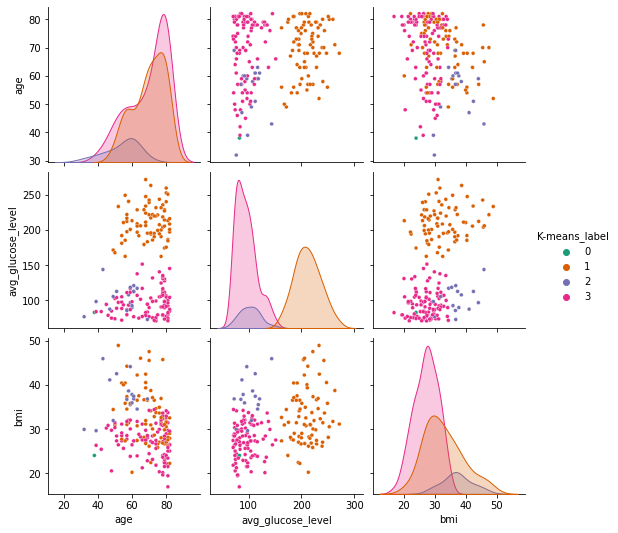

In [ ]:
sns.pairplot(stroke3, vars=['age', 'avg_glucose_level','bmi'], hue='K-means_label', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})#ดูรูปแบบความสัมพันธ์ แบบคู่ระหว่างตัวแปรภายในแต่ละคลัสเตอร์ และสามารถช่วยระบุรูปแบบและความสัมพันธ์ที่อาจไม่ปรากฏให้เห็นจากข้อมูลดิบเพียงอย่างเดียว
plt.show()#pair plot เฉพาะคนที่เป็นโรคหลอดเลือดในสมอง // อาจใช้เป็นแนวทางในการป้องกันโรคหลอดเลือดในสมอง

In [ ]:
stroke3['K-means_label'].value_counts()#จำนวนสมาชิกในแต่ละกลุ่ม(stroke)

3    96
1    75
2    16
0     1
Name: K-means_label, dtype: int64

# Decision tree classifier

### DT defult parameter

https://bigdata.go.th/big-data-101/machine-learning-model-hyperparameter-optimization/

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = stroke_data_cleaned_dummies.drop("stroke", axis=1)#ดรอปคอลัมน์ stroke เก็บไว้ในตัวแปร X
y = stroke_data_cleaned_dummies["stroke"]#เลือกคอลัมน์ stroke เก็บไว้ในตัวแปร y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,shuffle = True,random_state=1) #แบ่งข้อมูลเป็น Train 80% Test 20%

In [ ]:
#ดูจำนวนแถวและคอลัมน์
print(f'Number of X train: {X_train.shape}')
print(f'Number of X test: {X_test.shape}')
print(f'Number of y train: {y_train.shape}')
print(f'Number of y test: {y_test.shape}')

Number of X train: (3249, 20)
Number of X test: (813, 20)
Number of y train: (3249,)
Number of y test: (813,)


In [ ]:
# Import
from sklearn.tree import DecisionTreeClassifier


# Define
clf = DecisionTreeClassifier(random_state=1)

# Train
clf.fit(X_train,y_train)

# Predict 
y_pred=clf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )  

accuracy = 0.923739237392374
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       774
           1       0.17      0.15      0.16        39

    accuracy                           0.92       813
   macro avg       0.56      0.56      0.56       813
weighted avg       0.92      0.92      0.92       813



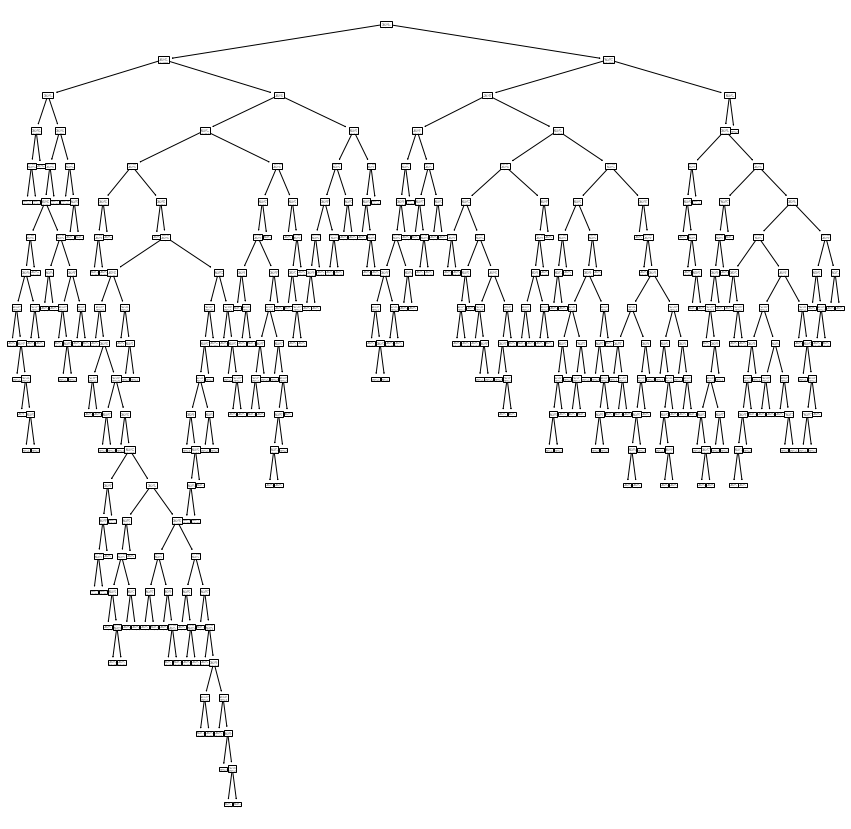

In [ ]:
from sklearn import tree
tree.plot_tree(clf);

### 10-fold cross validation and find the best parameters

In [ ]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]} 

# Define
clf1 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt1 =  GridSearchCV(estimator=clf1, 
                           param_grid=parameters_dt, 
                           cv=10, n_jobs=-1, verbose=3,scoring = "accuracy")
# Fit the grid search object to the data // หาพารามิเตอร์ที่ดีที่สุด เเล้วใช้  cross-va

In [ ]:
%%time
# Fit the GridSearchCV object to the training data
grid_dt1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt1.best_params_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
CPU times: user 3.67 s, sys: 277 ms, total: 3.95 s
Wall time: 1min 10s


### Train DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,recall_score

In [ ]:
# Define decision tree classifier //กำหนดพารามิเตอร์จาก grid_dt1.best_params_
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',
                            max_depth=2,
                            min_samples_leaf=5,
                            min_samples_split=2,
                            random_state=1)
# Train
dt_clf1.fit(X_train, y_train)

# Predict
y_pred = dt_clf1.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )  

accuracy = 0.9520295202952029
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       774
           1       0.00      0.00      0.00        39

    accuracy                           0.95       813
   macro avg       0.48      0.50      0.49       813
weighted avg       0.91      0.95      0.93       813



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


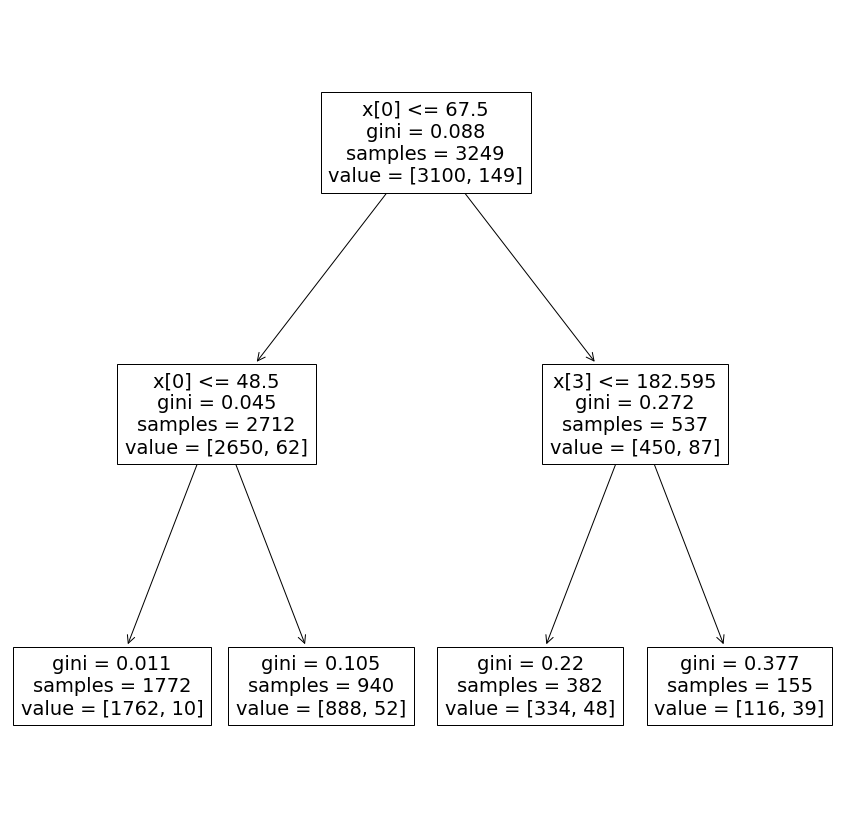

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt_clf1);

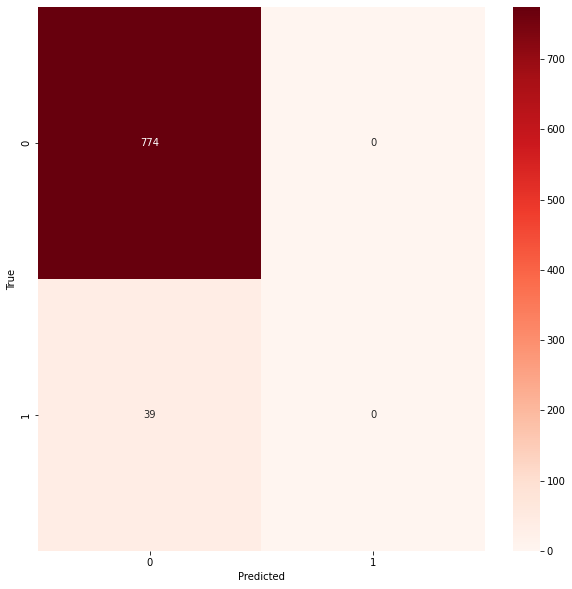

In [ ]:
# confusion_matrix ดูว่าโมเดลทำนายเป็นยังไงบ้าง
cm1 = confusion_matrix(y_test, dt_clf1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm1, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 10-fold cross validation and find the best parameters (recall)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]} 

# Define
clf2 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt2 =  GridSearchCV(estimator=clf2, 
                           param_grid=parameters_dt, 
                           cv=10, n_jobs=-1, verbose=3, scoring = "recall")

In [ ]:
%%time
# Fit the GridSearchCV object to the training data
grid_dt2.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt2.best_params_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
CPU times: user 4.99 s, sys: 330 ms, total: 5.32 s
Wall time: 1min 16s


### Train DecisionTree model with recall

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,recall_score

In [ ]:
# Define decision tree classifier //กำหนดพารามิเตอร์จาก grid_dt2.best_params_
dt_clf2 = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth=10,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=1)
#Train
dt_clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf2.predict(X_test)

# Evaluate the recall of the classifier
print(f'recall = {recall_score(y_test, y_pred)}')
print(classification_report(y_test,y_pred))

recall = 0.02564102564102564
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       774
           1       0.05      0.03      0.03        39

    accuracy                           0.93       813
   macro avg       0.50      0.50      0.50       813
weighted avg       0.91      0.93      0.92       813



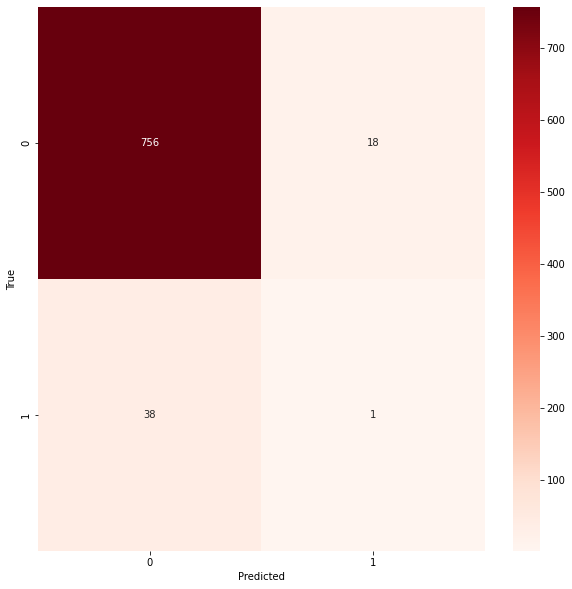

In [ ]:
# confusion_matrix
cm2 = confusion_matrix(y_test, dt_clf2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Train DecisionTree model with recall (2) (Random)

In [ ]:
parameters ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]} 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# RandomSearch จะทำการสุ่มเลือกค่าพารามิเตอร์จากกริดที่สร้างขึ้น 
#ดังนั้นการทำ Random Search จะไม่รับประกันว่าเราจะได้โมเดลที่มีประสิทธิภาพที่สุดเหมือนกับ Grid Search แต่วิธีมีประสิทธิภาพสูงในการใช้งานจริงเนื่องจากใช้เวลาในการสร้างโมเดลที่น้อยมาก
clf3 = DecisionTreeClassifier(random_state=1)
model = RandomizedSearchCV(estimator = clf3, param_distributions = parameters, n_iter = 100, cv = 10, verbose= 3, random_state= 1, n_jobs = -1,scoring = "recall")
model.fit(X_train,y_train)
predictionDT = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionDT))
print(classification_report(y_test,predictionDT))
acc4 = recall_score(y_test,predictionDT) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[[756  18]
 [ 38   1]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       774
           1       0.05      0.03      0.03        39

    accuracy                           0.93       813
   macro avg       0.50      0.50      0.50       813
weighted avg       0.91      0.93      0.92       813



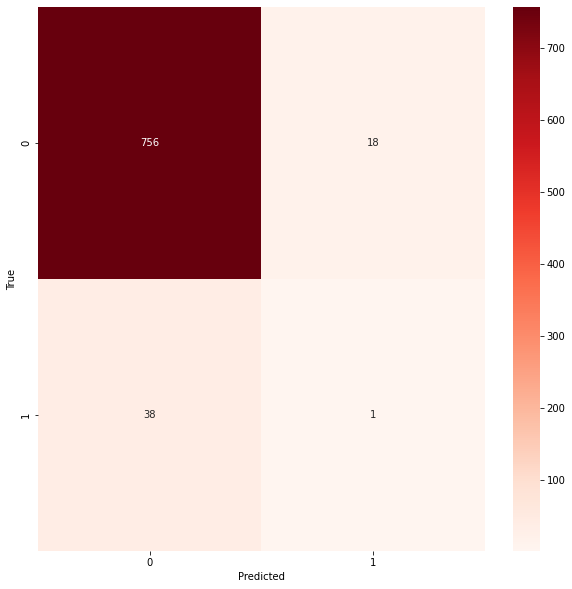

In [ ]:
# confusion_matrix
cm3 = confusion_matrix(y_test, model.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm3, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# NaiveBayes

### 10-fold cross validation and find the best parameters (acc)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score

In [ ]:
# Define the parameter grid to search over
parameters_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes classifier object
nb1 = GaussianNB()


# Create a GridSearchCV object with 10-fold cross-validation
grid_nb1 = GridSearchCV(estimator=nb1, 
                           param_grid=parameters_nb, 
                           cv=10, n_jobs=-1, verbose=3,scoring = "accuracy")

In [ ]:
%%time
# Fit the GridSearchCV object to the training data
grid_nb1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_nb1.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyperparameters:  {'var_smoothing': 1e-05}
CPU times: user 67.8 ms, sys: 7.51 ms, total: 75.4 ms
Wall time: 351 ms


### Train NaiveBayes model (acc)

In [ ]:
# Create a Gaussian Naive Bayes classifier
model_nb1 = GaussianNB(var_smoothing = 1e-05)

# Train the model on the training set
model_nb1.fit(X_train, y_train)

# Predict
y_pred = model_nb1.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy = 0.8277982779827798
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       774
           1       0.17      0.67      0.27        39

    accuracy                           0.83       813
   macro avg       0.58      0.75      0.59       813
weighted avg       0.94      0.83      0.87       813



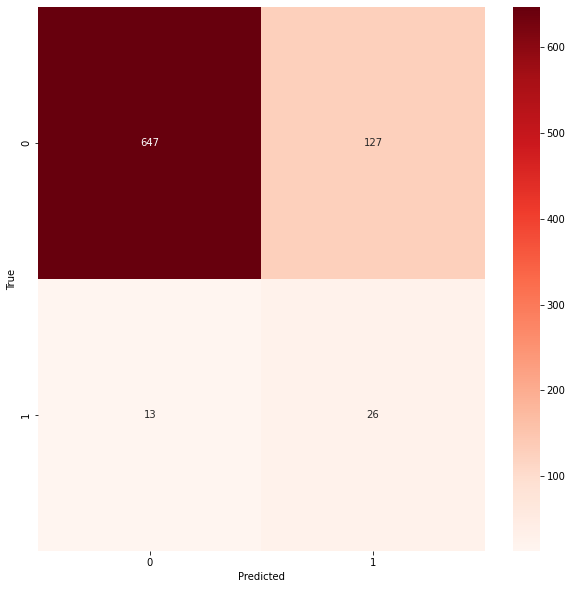

In [ ]:
# confusion_matrix
cm4 = confusion_matrix(y_test, model_nb1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm4, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 10-fold cross validation and find the best parameters (recall)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score

In [ ]:
# Define the parameter grid to search over
parameters_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes classifier object
nb2 = GaussianNB()


# Create a GridSearchCV object with 10-fold cross-validation
grid_nb2 = GridSearchCV(estimator=nb2, 
                           param_grid=parameters_nb, 
                           cv=10, n_jobs=-1, verbose=3,scoring = "recall")

In [ ]:
%%time
# Fit the GridSearchCV object to the data
grid_nb2.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_nb2.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyperparameters:  {'var_smoothing': 1e-09}
CPU times: user 72 ms, sys: 1.23 ms, total: 73.2 ms
Wall time: 389 ms


### Train NaiveBayes model (recall)

In [ ]:
# Create a Gaussian Naive Bayes classifier
model_nb2 = GaussianNB(var_smoothing = 1e-09)

# Train the model on the training set
model_nb2.fit(X_train, y_train)

#predict
y_pred = model_nb2.predict(X_test)

#Evaluation
from sklearn.metrics import recall_score, classification_report
print(f'recall = {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

recall = 0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       774
           1       0.07      0.97      0.13        39

    accuracy                           0.38       813
   macro avg       0.53      0.66      0.32       813
weighted avg       0.95      0.38      0.49       813



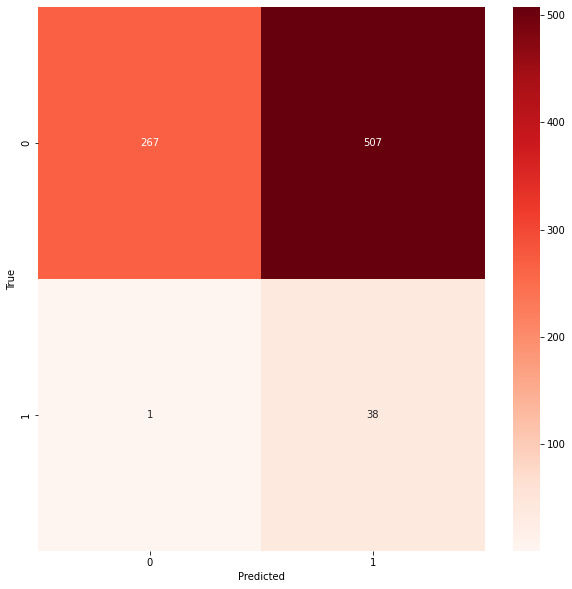

In [ ]:
# confusion_matrix
cm42 = confusion_matrix(y_test, model_nb2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm42, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbors

## 10-fold cross validation and find the best parameters (acc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
# Define the parameter grid to search over
parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# Create the KNN classifier
knn1 = KNeighborsClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
grid_knn1 = GridSearchCV(estimator=knn1, param_grid=parameters_knn, cv=10, n_jobs=-1, verbose=3,scoring = "accuracy")

In [ ]:
%%time
# Fit the GridSearchCV object to the training data
grid_knn1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_knn1.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
CPU times: user 269 ms, sys: 18.9 ms, total: 288 ms
Wall time: 4.98 s


## Train KNN model (acc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instantiate KNN model
knn1 = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree')

# Fit the model to the training data
knn1.fit(X_train, y_train)

# Predict the test data
y_pred = knn1.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy = 0.95079950799508
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       774
           1       0.00      0.00      0.00        39

    accuracy                           0.95       813
   macro avg       0.48      0.50      0.49       813
weighted avg       0.91      0.95      0.93       813



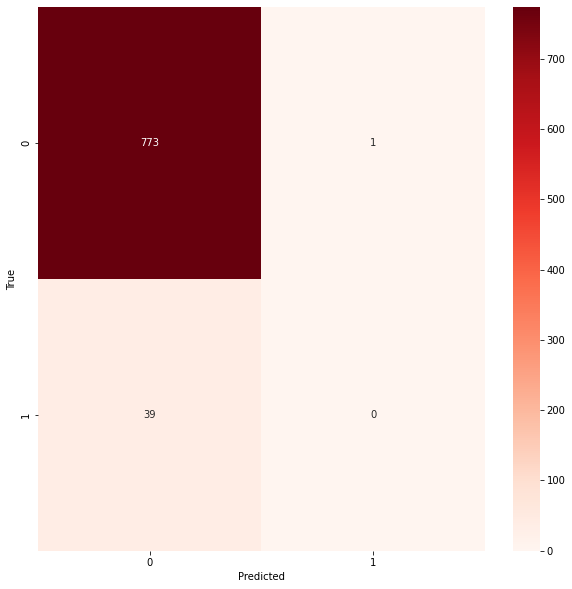

In [ ]:
# confusion_matrix
cm5 = confusion_matrix(y_test, knn1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm5, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 10-fold cross validation and find the best parameters (recall)

In [ ]:
parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# Create the KNN classifier
knn2 = KNeighborsClassifier()

# Create a GridSearchCV object with 10-fold cross-validation
grid_knn2 = GridSearchCV(estimator=knn2, param_grid=parameters_knn, verbose=3, cv=10,scoring='recall',n_jobs=-1)

In [ ]:
%%time
# Fit the GridSearchCV object to the training data
grid_knn2.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_knn2.best_params_)
grid_knn2.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
CPU times: user 345 ms, sys: 35 ms, total: 380 ms
Wall time: 6.82 s


0.05333333333333333

## Train KNN model (recall)

In [ ]:
# Instantiate KNN model
knn2 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree')

# Fit the model to the training data
knn2.fit(X_train, y_train)

# Predict the test data
y_pred = knn2.predict(X_test)

# Evaluation
from sklearn.metrics import recall_score, classification_report
print(f'recall = {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

recall = 0.07692307692307693
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       774
           1       0.13      0.08      0.10        39

    accuracy                           0.93       813
   macro avg       0.54      0.53      0.53       813
weighted avg       0.91      0.93      0.92       813



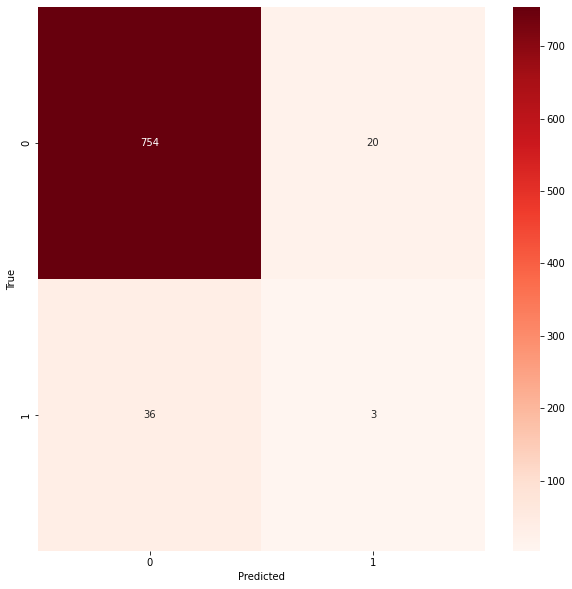

In [ ]:
# confusion_matrix
cm6 = confusion_matrix(y_test, knn2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm6, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# รวม 3 โมเดล DT,NB,KNN

## model selection (acc)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 1
knn1 = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree')
scores = cross_val_score(knn1, X_train, y_train, cv=10)
print('Mean cross-validation score: K11N0_weighted', scores.mean())
#2
knn2 = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='ball_tree')
scores = cross_val_score(knn2, X_train, y_train, cv=10)
print('Mean cross-validation score: K3weighted', scores.mean())
#3
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',max_depth=2,min_samples_leaf=5,min_samples_split=2,random_state=1)
scores = cross_val_score(dt_clf1, X_train, y_train, cv=10)
print('Mean cross-validation score: DecisionTree_max_depth=2', scores.mean())
#4
dt_clf2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,min_samples_leaf=3,min_samples_split=2,random_state=1)
scores = cross_val_score(dt_clf2, X_train, y_train, cv=10)
print('Mean cross-validation score: DecisionTree_max_depth=10', scores.mean())
#5 
model_nb1 = GaussianNB(var_smoothing = 1e-05)
scores = cross_val_score(model_nb1, X_train, y_train, cv=10)
print('Mean cross-validation score: var_smoothing1e-05', scores.mean())
#6
model_nb2 = GaussianNB(var_smoothing = 1e-09)
scores = cross_val_score(model_nb2, X_train, y_train, cv=10)
print('Mean cross-validation score: var_smoothing1e-09', scores.mean())

Mean cross-validation score: K11N0_weighted 0.9532174738841406
Mean cross-validation score: K3weighted 0.9430550807217475
Mean cross-validation score: DecisionTree_max_depth=2 0.9526020892687559
Mean cross-validation score: DecisionTree_max_depth=10 0.9353627730294397
Mean cross-validation score: var_smoothing1e-05 0.8125546058879394
Mean cross-validation score: var_smoothing1e-09 0.36904368471035137


## Train model (acc)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree')
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Accuracy score:  0.95079950799508


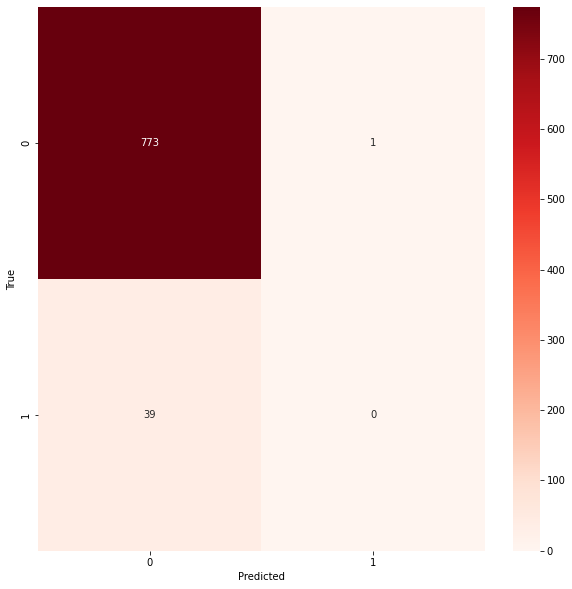

In [ ]:
# confusion_matrix
cm7 = confusion_matrix(y_test, knn1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm7, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## model selection (recall)

In [ ]:
# 1
knn1 = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree')
#2
knn2 = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='ball_tree')
#3
dt_clf1 = DecisionTreeClassifier(criterion = 'gini',max_depth=2,min_samples_leaf=5,min_samples_split=2,random_state=1)
#4
dt_clf2 = DecisionTreeClassifier(criterion = 'gini',max_depth=10,min_samples_leaf=3,min_samples_split=2,random_state=1)
#5 
model_nb1 = GaussianNB(var_smoothing = 1e-05)
#6
model_nb2 = GaussianNB(var_smoothing = 1e-09)

#ใช้ recall  เนื่องจากในทางการแพทย์เราต้องการทราบแค่ว่าโมเดลสามารถระบุได้ว่าเป็นแล้วมันเป็นเท่าไหร่
# Compute the recall_scores using cross-validation
recall_knn1 = cross_val_score(knn1, X_train, y_train, cv=10, scoring='recall')
recall_knn2 = cross_val_score(knn2, X_train, y_train, cv=10, scoring='recall')
recall_dt1 = cross_val_score(dt_clf1, X_train, y_train, cv=10, scoring='recall')
recall_dt2 = cross_val_score(dt_clf2, X_train, y_train, cv=10, scoring='recall')
recall_nb1 = cross_val_score(model_nb1, X_train, y_train, cv=10, scoring='recall')
recall_nb2 = cross_val_score(model_nb2, X_train, y_train, cv=10, scoring='recall')


# Print the mean recall scores for each model
print("Decision Tree1 recall score:", recall_dt1.mean())
print("Decision Tree2 recall score:", recall_dt2.mean())
print("Naive Bayes1 recall score:", recall_nb1.mean())
print("Naive Bayes2 recall score:", recall_nb2.mean())
print("K-Nearest Neighbors1 recall score:", recall_knn1.mean())
print("K-Nearest Neighbors2 recall score:", recall_knn2.mean())

Decision Tree1 recall score: 0.013333333333333332
Decision Tree2 recall score: 0.10095238095238095
Naive Bayes1 recall score: 0.5571428571428572
Naive Bayes2 recall score: 0.9528571428571428
K-Nearest Neighbors1 recall score: 0.0
K-Nearest Neighbors2 recall score: 0.05333333333333333


## Train model (recall)

In [ ]:
model_nb2 = GaussianNB(var_smoothing = 1e-09)
model_nb2.fit(X_train,y_train)
y_pred = model_nb2.predict(X_test)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Print f1 score
print("Recall score: ", recall)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Recall score:  0.9743589743589743
Accuracy score:  0.3751537515375154


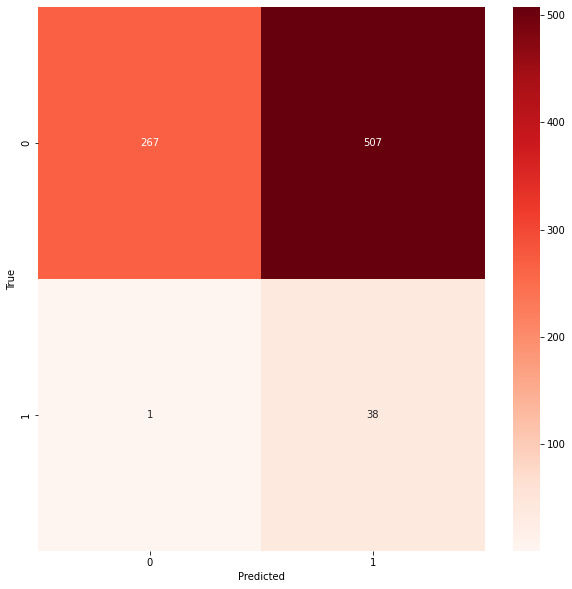

In [ ]:
# confusion_matrix โมเดลทายคนที่เป็น stroke ได้ 97% และโมเดลมีความแม่นยำ 38%
cm8 = confusion_matrix(y_test, model_nb2.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm8, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model_nb1 = GaussianNB(var_smoothing = 1e-05)
model_nb1.fit(X_train,y_train)
y_pred = model_nb1.predict(X_test)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Print f1 score
print("Recall score: ", recall)
# Print the accuracy score
print("Accuracy score: ", accuracy)

Recall score:  0.6666666666666666
Accuracy score:  0.8277982779827798


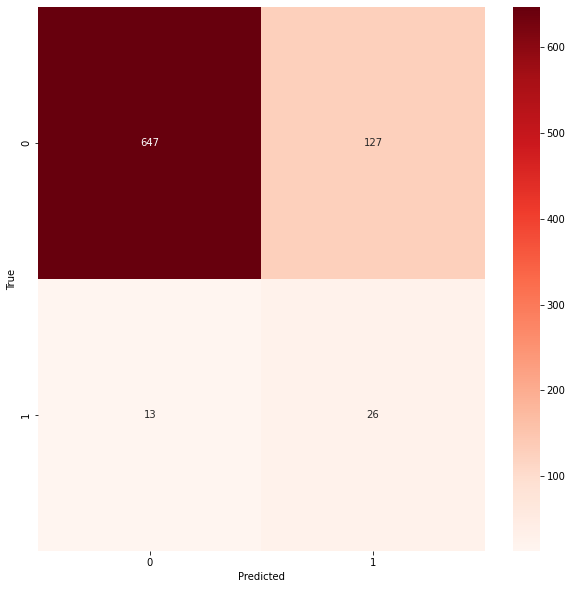

In [ ]:
# confusion_matrix โมเดลทายคนที่เป็น stroke ได้ 66% และโมเดลมีความแม่นยำ 82%
cm9 = confusion_matrix(y_test, model_nb1.predict(X_test))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sns.heatmap(cm9, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Association rule

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df1 = stroke_data_clean.drop(columns=['id'])
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4062.000000,4062.000000,4062.000000,4062.000000,4062.000000,4062.000000
mean,43.526046,0.094042,0.053668,112.528213,28.677351,0.046283
std,22.397147,0.291924,0.225389,43.920209,6.982377,0.210122
min,1.080000,0.000000,0.000000,70.010000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,83.272500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,96.575000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,120.067500,33.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


## จัดกลุ่ม

In [ ]:
# Define age groups
bins = [0, 20 , 59, 100]
labels = ['<19','20-59','60+']

# Group ages into age groups
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels)

df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,20-59
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,60+
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,<19
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,20-59
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,20-59


In [ ]:
# Define BMI categories or groups
bins = [0, 18.5, 22.9, 24.9, 29.9, 50]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II']

# Group BMI values into categories or groups
df1['bmi_category'] = pd.cut(df1['bmi'], bins=bins, labels=labels)

df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+,Obese Class II
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+,Obese Class II
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,20-59,Obese Class II
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+,Overweight
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,60+,Obese Class I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,<19,Normal
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+,Obese Class II
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,20-59,Obese Class II
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,20-59,Obese Class I


In [ ]:
# Define glucose level categories or bins
bins = [0, 70, 100, 125, 300]
labels = ['Low', 'Normal', 'High', 'Very high']

# Group average glucose level into categories or bins
df1['glucose_category'] = pd.cut(df1['avg_glucose_level'], bins=bins, labels=labels)

df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,glucose_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+,Obese Class II,Very high
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+,Obese Class II,High
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,20-59,Obese Class II,Very high
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+,Overweight,Very high
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,60+,Obese Class I,Very high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,<19,Normal,High
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+,Obese Class II,Very high
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,20-59,Obese Class II,Normal
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,20-59,Obese Class I,Very high


## one hot

--------------------------------------------------------------------------------

In [ ]:
# convert categorical variables to numerical using one-hot encoding
cat_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','age_group',	'bmi_category', 'glucose_category','stroke']
data_encoded = pd.get_dummies(df1, columns=cat_vars)

In [ ]:
data_encoded

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese Class I,bmi_category_Obese Class II,glucose_category_Low,glucose_category_Normal,glucose_category_High,glucose_category_Very high,stroke_0,stroke_1
0,67.0,228.69,36.6,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,0,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,49.0,171.23,34.4,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,79.0,174.12,24.0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,81.0,186.21,29.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,103.08,18.6,1,0,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
5106,81.0,125.20,40.0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
5107,35.0,82.99,30.6,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
5108,51.0,166.29,25.6,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
data_encoded.columns

Index(['age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'hypertension_0', 'hypertension_1', 'heart_disease_0',
       'heart_disease_1', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age_group_<19', 'age_group_20-59',
       'age_group_60+', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese Class I',
       'bmi_category_Obese Class II', 'glucose_category_Low',
       'glucose_category_Normal', 'glucose_category_High',
       'glucose_category_Very high', 'stroke_0', 'stroke_1'],
      dtype='object')

In [ ]:
tdata = data_encoded.drop('age',axis=1)

In [ ]:
tdata = tdata.drop('avg_glucose_level',axis=1)

In [ ]:
tdata = tdata.drop('bmi',axis=1)

In [ ]:
tdata = tdata.drop('stroke_0',axis=1)

In [ ]:
tdata

,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese Class I,bmi_category_Obese Class II,glucose_category_Low,glucose_category_Normal,glucose_category_High,glucose_category_Very high,stroke_1
0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
4,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
5,0,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5106,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
5107,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5108,0,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
tdata.columns

Index(['gender_Female', 'gender_Male', 'hypertension_0', 'hypertension_1',
       'heart_disease_0', 'heart_disease_1', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'age_group_<19',
       'age_group_20-59', 'age_group_60+', 'bmi_category_Underweight',
       'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese Class I', 'bmi_category_Obese Class II',
       'glucose_category_Low', 'glucose_category_Normal',
       'glucose_category_High', 'glucose_category_Very high', 'stroke_1'],
      dtype='object')

## ทำ association rule

In [ ]:
# Build association rules
frequent_itemsets = apriori(tdata, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_stroke1 = rules[rules["consequents"].astype(str).str.contains("stroke_1")]

# print the resulting rules
print(rules_stroke1)

                                        antecedents  \
54                                    (gender_Male)   
106                                (hypertension_1)   
194                              (ever_married_Yes)   
238                             (work_type_Private)   
254                       (work_type_Self-employed)   
...                                             ...   
188368  (age_group_60+, glucose_category_Very high)   
188369                           (ever_married_Yes)   
188371                          (work_type_Private)   
188372                              (age_group_60+)   
188373                 (glucose_category_Very high)   

                                              consequents  antecedent support  \
54                                             (stroke_1)            0.411620   
106                                            (stroke_1)            0.094042   
194                                            (stroke_1)            0.661251   
238            

In [ ]:
rules_stroke1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,(gender_Male),(stroke_1),0.411620,0.046283,0.021172,0.051435,1.111333,0.002121,1.005432
106,(hypertension_1),(stroke_1),0.094042,0.046283,0.013048,0.138743,2.997744,0.008695,1.107356
194,(ever_married_Yes),(stroke_1),0.661251,0.046283,0.041359,0.062547,1.351404,0.010755,1.017349
238,(work_type_Private),(stroke_1),0.576809,0.046283,0.028065,0.048656,1.051271,0.001369,1.002494
254,(work_type_Self-employed),(stroke_1),0.160512,0.046283,0.011817,0.073620,1.590654,0.004388,1.029509
...,...,...,...,...,...,...,...,...,...
188368,"(age_group_60+, glucose_category_Very high)","(ever_married_Yes, work_type_Private, stroke_1)",0.096750,0.025357,0.010094,0.104326,4.114281,0.007640,1.088167
188369,(ever_married_Yes),"(work_type_Private, glucose_category_Very high...",0.661251,0.011078,0.010094,0.015264,1.377861,0.002768,1.004251
188371,(work_type_Private),"(ever_married_Yes, age_group_60+, glucose_cate...",0.576809,0.016002,0.010094,0.017499,1.093549,0.000863,1.001524
188372,(age_group_60+),"(ever_married_Yes, work_type_Private, glucose_...",0.271049,0.012555,0.010094,0.037239,2.965967,0.006690,1.025638


In [ ]:
rules_stroke1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
188358,"(work_type_Private, glucose_category_Very high...","(ever_married_Yes, stroke_1)",0.051699,0.041359,0.010094,0.195238,4.720578,0.007955,1.191211
48628,"(work_type_Private, glucose_category_Very high...",(stroke_1),0.051699,0.046283,0.011078,0.214286,4.629939,0.008686,1.213822
188347,"(ever_married_Yes, work_type_Private, glucose_...",(stroke_1),0.047760,0.046283,0.010094,0.211340,4.566297,0.007883,1.209289
188368,"(age_group_60+, glucose_category_Very high)","(ever_married_Yes, work_type_Private, stroke_1)",0.096750,0.025357,0.010094,0.104326,4.114281,0.007640,1.088167
48635,"(age_group_60+, glucose_category_Very high)","(work_type_Private, stroke_1)",0.096750,0.028065,0.011078,0.114504,4.079952,0.008363,1.097616
...,...,...,...,...,...,...,...,...,...
37429,"(bmi_category_Obese Class II, heart_disease_0)","(work_type_Private, stroke_1)",0.367307,0.028065,0.010340,0.028150,1.003034,0.000031,1.000088
28259,"(bmi_category_Obese Class II, hypertension_0)","(ever_married_Yes, stroke_1)",0.338503,0.041359,0.014032,0.041455,1.002312,0.000032,1.000100
43875,(work_type_Private),"(ever_married_Yes, age_group_60+, stroke_1)",0.576809,0.030281,0.017479,0.030303,1.000739,0.000013,1.000023
27687,(Residence_type_Urban),"(ever_married_Yes, hypertension_0, stroke_1)",0.507878,0.030527,0.015510,0.030538,1.000367,0.000006,1.000012


#แปลผล
- ได้ค่า lift ที่มากที่สุด เท่ากับ 4.720578 คือ {'age_group_60+', 'glucose_category_Very high', 'work_type_Private'} และ {'ever_married_Yes', 'stroke_1'} หมายความว่า คนในช่วงอายุ 60 ปีขึ้นไป ที่มีน้ำตาลในเลือดสูงมากจนเสี่ยงเป็นโรคเบาหวาน และมีธุรกิจส่วนตัว มีแนวโน้มที่จะแต่งงานแล้วและเป็น Stroke 4.720578 เท่า เมื่อเทียบกับโอกาสที่จะเกิดขึ้นทั้งหมด
- {'age_group_60+', 'glucose_category_Very high', 'work_type_Private'} และ {'ever_married_Yes', 'stroke_1'} ได้ค่า support เท่ากับ 0.0100935 หมายความว่า มี 1% ของชุดข้อมูลนี้ที่มีทั้ง {'age_group_60+', 'glucose_category_Very high', 'work_type_Private'} และ {'ever_married_Yes', 'stroke_1'} ปรากฎอยู่
- {'age_group_60+', 'glucose_category_Very high', 'work_type_Private'} และ {'ever_married_Yes', 'stroke_1'} ได้ค่า confidence เท่ากับ 0.195238 หมายความว่า 19.52% ของชุดข้อมูลนี้ คนในช่วงอายุ 60 ปีขึ้นไป ที่มีน้ำตาลในเลือดสูงมากจนเสี่ยงเป็นโรคเบาหวาน และมีธุรกิจส่วนตัว จะแต่งงานแล้วและเป็น Stroke